# ECG Signal Processing using python  
### 2022094093 Kim Dohoon, Dept. of Data Science

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import signal

In [2]:
# Load Data
ecg = []
with open('ECG3.dat', 'r') as f:
    for i in f.readlines():
        ecg.append(float(i.strip('\n').strip(' ')))


In [103]:
def plotSignal(timestep, signal, title='Raw ECG', dpi=100):
    plt.figure(dpi=dpi)
    plt.figure(figsize=(16, 8))
    plt.subplots(constrained_layout=True)
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False

    plt.subplot(2, 1, 1)
    plt.plot(timestep, signal)
    plt.title(title)
    plt.xlabel('second(s)')
    plt.ylabel('Volts')

    plt.subplot(2, 1, 2)
    plt.plot(timestep[200:600], signal[200:600])
    plt.title('1s~3s')
    plt.xlabel('second(s)')
    plt.ylabel('Volts')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

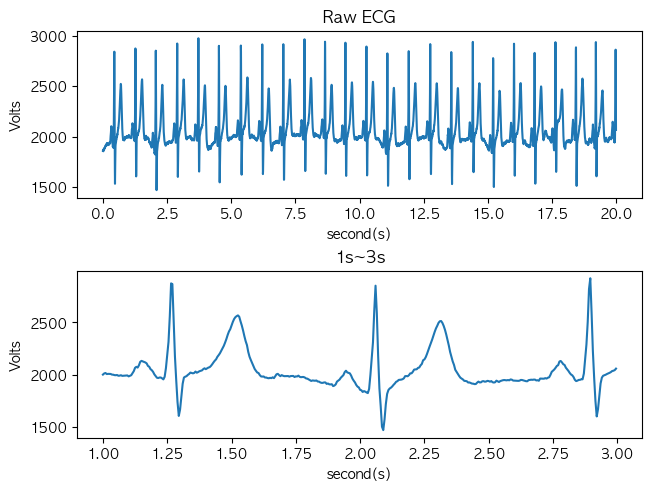

In [110]:
# Raw data
sampling_rate = 200
N = len(ecg)
t = np.arange(0, N) / sampling_rate

plotSignal(t, ecg)
plt.savefig('../figure/Raw.png')


/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

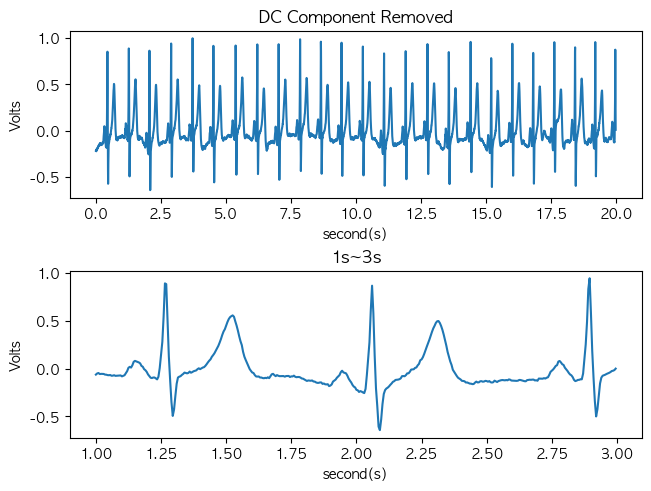

In [111]:
# Remove DC Component
ecg_dc = ecg - np.mean(ecg)
ecg_dc /= max(ecg_dc)

plotSignal(t, ecg_dc, title='DC Component Removed')
plt.savefig('../figure/DC.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

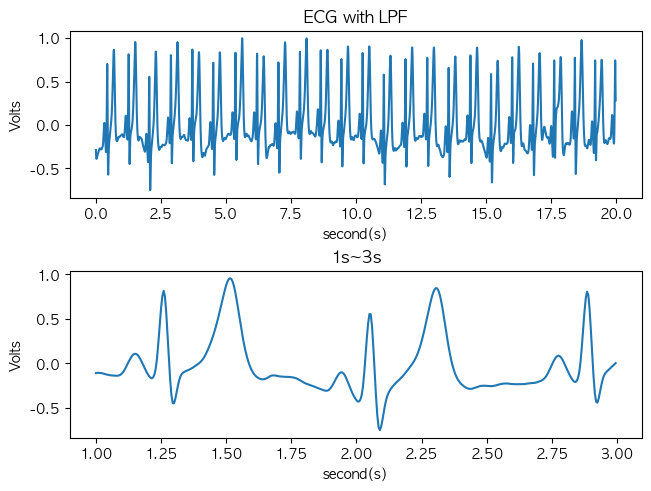

In [112]:
# Low Pass Filter
lpf = scipy.io.loadmat('lpf.mat')['lpf']
impulse = signal.unit_impulse(13)
lpf_b, lpf_a = lpf[0][0]
h_lp = signal.lfilter(lpf_b[0], lpf_a[0], impulse)
ecg_lp = signal.convolve(ecg_dc, h_lp)

ecg_lp = ecg_lp[6:N+6]  # Remove delay
ecg_lp /= max(ecg_lp)  # Normalize
plotSignal(t, ecg_lp, title='ECG with LPF')
plt.savefig('../figure/LPF.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

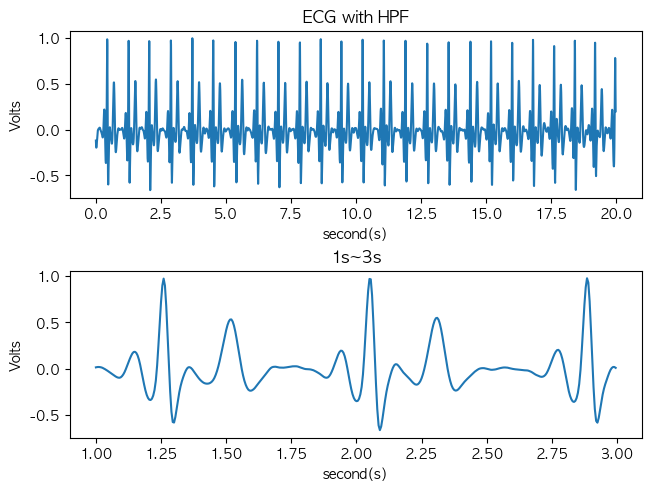

In [113]:
# High Pass Filter
hpf = scipy.io.loadmat('hpf.mat')['hpf']
impulse = signal.unit_impulse(33)
hpf_b, hpf_a = hpf[0][0]
h_hp = signal.lfilter(hpf_b[0], hpf_a[0], impulse)
ecg_hp = signal.convolve(ecg_lp, h_hp)

ecg_hp = ecg_hp[16:N+16]  # Remove delay
ecg_hp /= max(ecg_hp)  # Normalize
plotSignal(t, ecg_hp, title='ECG with HPF')
plt.savefig('../figure/HPF.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

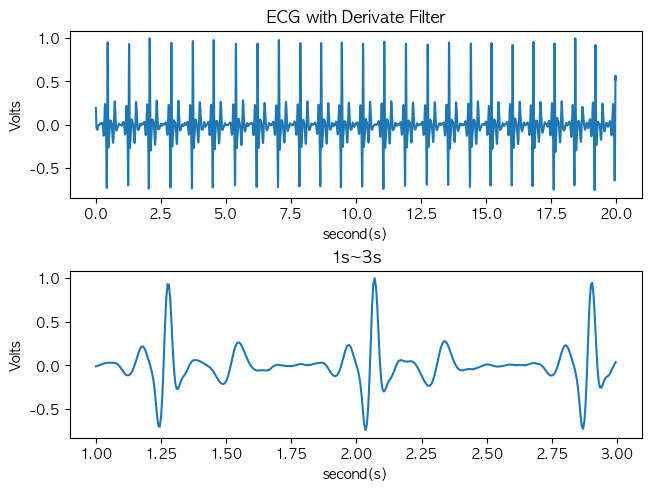

In [114]:
# Derivate Filter
df = scipy.io.loadmat('df.mat')['df'][0][0][0][0]
ecg_df = signal.convolve(ecg_hp, df)

ecg_df = ecg_df[2:N+2]  # Remove delay
ecg_df /= max(ecg_df)  # Normalize
plotSignal(t, ecg_df, title='ECG with Derivate Filter')
plt.savefig('../figure/Derivative.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

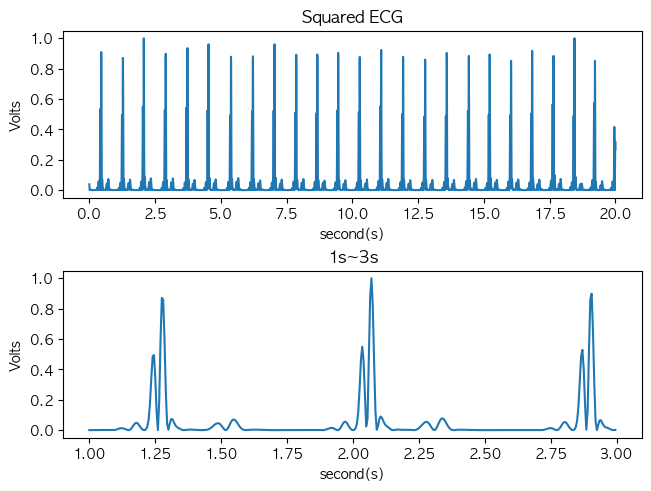

In [115]:
# Squaring
ecg_sq = ecg_df**2
ecg_sq /= max(ecg_sq)

plotSignal(t, ecg_sq, title='Squared ECG')
plt.savefig('../figure/Squared.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3970327467.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 640x480 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

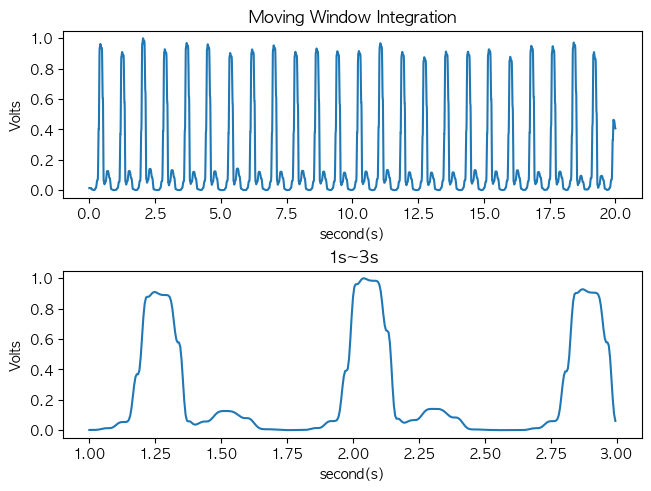

In [116]:
# Moving Window Integration
mw = scipy.io.loadmat('mw.mat')['mw'][0][0][0][0]
ecg_mw = signal.convolve(ecg_sq, mw)
ecg_mw = ecg_mw[15:N+15]
ecg_mw /= max(abs(ecg_mw))

plotSignal(t, ecg_mw, title='Moving Window Integration')
plt.savefig('../figure/MWI.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3115358482.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


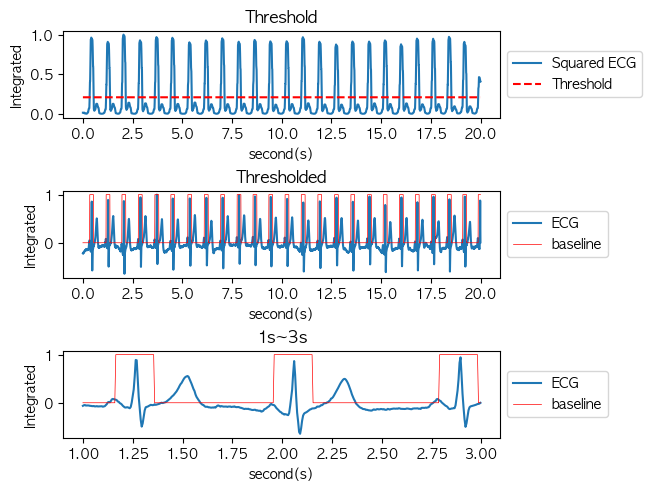

In [117]:
# Thresholding
max_h = max(ecg_mw)
threshold = np.mean(ecg_mw)
ecg_threshold = np.where(ecg_mw>threshold*max_h, 1, 0)

# Plot
plt.subplots(constrained_layout=True)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.subplot(3, 1, 1)
plt.plot(t, ecg_mw, label='Squared ECG')
plt.plot(t, threshold*max_h*np.ones_like(t), linestyle='--', color='red', label='Threshold')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('second(s)')
plt.ylabel('Integrated')
plt.title('Threshold')

plt.subplot(3, 1, 2)
plt.plot(t, ecg_dc, label='ECG')
plt.plot(t, ecg_threshold, color='red', label='baseline', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('second(s)')
plt.ylabel('Integrated')
plt.title('Thresholded')

plt.subplot(3, 1, 3)
plt.plot(t[200:600], ecg_dc[200:600], label='ECG')
plt.plot(t[200:600], ecg_threshold[200:600], color='red', label='baseline', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('second(s)')
plt.ylabel('Integrated')
plt.title('1s~3s')

plt.savefig('../figure/Threshold.png')

/var/folders/qb/01y_x1nx5jn6frq074vhfbc00000gn/T/ipykernel_98565/3306475316.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


<Figure size 1600x800 with 0 Axes>

<Figure size 1280x960 with 0 Axes>

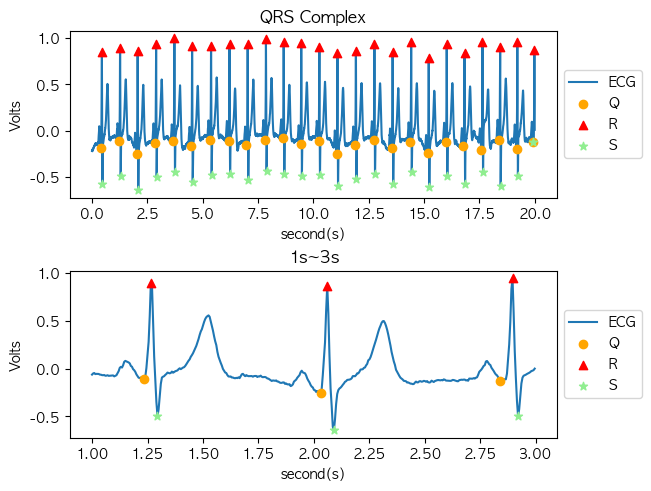

In [119]:
# Find QRS Complex
left = np.where(np.diff(ecg_threshold, prepend=0)==1)[0]
right = np.where(np.diff(ecg_threshold, append=0)==-1)[0]

qx, qy, rx, ry, sx, sy = [], [], [], [], [], []
for i in range(len(left)):
    segment = ecg_dc[left[i]:right[i]+1]
    # R
    r, r_loc = segment.max(), segment.argmax()
    rx.append((r_loc + left[i])/200 )
    ry.append(r)
    # Q
    q, q_loc = segment[:r_loc].min(), segment[:r_loc].argmin()
    qx.append((q_loc + left[i])/200)
    qy.append(q)
    # S
    s, s_loc = segment.min(), segment.argmin()
    sx.append((s_loc + left[i])/200)
    sy.append(s)

plt.figure(figsize=(16, 8))
plt.figure(dpi=200)
plt.subplots(constrained_layout=True)

plt.subplot(2, 1, 1)
plt.plot(t, ecg_dc, label='ECG', zorder=-1)
plt.title('QRS Complex')
plt.xlabel('second(s)')
plt.ylabel('Volts')
plt.scatter(qx, qy, color='orange', label='Q')
plt.scatter(rx, ry, marker='^', color='red', label='R')
plt.scatter(sx, sy, marker='*', color='#90EE90', label='S')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2, 1, 2)
plt.plot(t[200:600], ecg_dc[200:600], label='ECG', zorder=-1)
plt.title('1s~3s')
plt.xlabel('second(s)')
plt.ylabel('Volts')
plt.scatter(qx[1:4], qy[1:4], color='orange', label='Q')
plt.scatter(rx[1:4], ry[1:4], marker='^', color='red', label='R')
plt.scatter(sx[1:4], sy[1:4], marker='*', color='#90EE90', label='S')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('../figure/QRS.png')

In [125]:
# mRR and BPM
mRR = np.mean(np.diff(rx)*200) / sampling_rate
bpm = 60./mRR

print(f"mRR : {mRR:.5f}\nBPM : {bpm:.5f}")

mRR : 0.81396
BPM : 73.71385
